<a href="https://colab.research.google.com/github/KJ-black/Machine-Learning-on-Material-Informatics/blob/main/HW6_clustering/louvain_modularity_clustering_by_Euclidean_distance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load Dataset

## Load Data Points

In [47]:
import numpy as np
import pandas as pd
import scipy.io

XYZ_Coord = scipy.io.loadmat('data/XYZcoord1.mat')
XYZ_C = np.array(XYZ_Coord ['XYZ1'])
print(XYZ_C)
print(XYZ_C.shape)

[[ 0.6851533   1.17897583  3.52402492]
 [ 1.00216962  1.21572705 29.32701994]
 [ 1.15125728  3.32476951 23.614195  ]
 ...
 [90.13576705 15.58773776 34.16825421]
 [90.73121678 16.76765189 13.4218382 ]
 [89.09981586 18.50040944 13.39066304]]
(2000, 3)


### Visualize Data Points

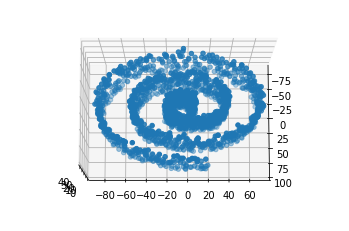

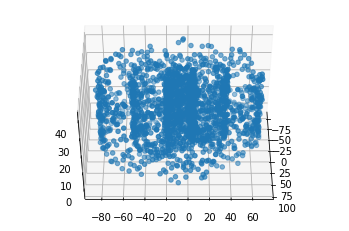

In [48]:
import matplotlib.pyplot as plt
fig1 = plt.figure()
ax = plt.axes(projection='3d')
z = XYZ_C[:,2]
x = XYZ_C[:,0]
y = XYZ_C[:,1]
ax.scatter(x, y, z, cmap = plt.get_cmap('jet'))
ax.view_init(80, 0)

fig2 = plt.figure()
ax = plt.axes(projection='3d')
z = XYZ_C[:,2]
x = XYZ_C[:,0]
y = XYZ_C[:,1]
ax.scatter(x, y, z, cmap = plt.get_cmap('jet'))
ax.view_init(45, 0)

## Edges by Euclidean distance

In [49]:
import math

def dist(a,b):
    r = (a[0]-b[0])**2+(a[1]-b[1])**2+(a[2]-b[2])**2
    r = math.sqrt(r)
    return r

import tqdm
XYZ_Edges = np.empty(shape=[0, 3])
Euclidean_calTemp = np.empty(shape=[0, 3])

for i in tqdm.tqdm(range(len(XYZ_C))):
    for j in range(i+1, len(XYZ_C)):
        pair = [ i+1, j+1, 1/dist(XYZ_C[i], XYZ_C[j]) ] # 1/dist for the farther of the distance the weight of the graph will be smaller
        Euclidean_calTemp = np.vstack(( Euclidean_calTemp, pair))
    
    if i % 20 == 0 or i == len(XYZ_C)-1:
        XYZ_Edges = np.vstack((XYZ_Edges, Euclidean_calTemp))
        Euclidean_calTemp = np.empty(shape=[0, 3])

print(XYZ_Edges)


100%|██████████| 2000/2000 [01:55<00:00, 17.27it/s] 

[[1.00000000e+00 2.00000000e+00 3.87522270e-02]
 [1.00000000e+00 3.00000000e+00 4.94809085e-02]
 [1.00000000e+00 4.00000000e+00 8.98288598e-02]
 ...
 [1.99800000e+03 1.99900000e+03 4.81035854e-02]
 [1.99800000e+03 2.00000000e+03 4.76047389e-02]
 [1.99900000e+03 2.00000000e+03 4.20149911e-01]]


# Construct the Network using networkx

Use the following command to install required package.
<br>`pip install python-louvain networkx`
- [Community detection for NetworkX’s documentation](https://python-louvain.readthedocs.io/en/latest/index.html)
- [Software for Complex Networks](https://networkx.github.io/documentation/stable/index.html)

In [50]:
from community import community_louvain
import networkx as nx

# Use pre-defined linkage (Edges.csv) to constructure whole network
G = nx.Graph() # Construct no direct graph
for i in range(0, len(XYZ_Edges)):    
    e = ( str(int(XYZ_Edges[i,0])), str(int(XYZ_Edges[i,1])), XYZ_Edges[i,2] ) # e = ( node1, node2, weight )
    G.add_weighted_edges_from([(e)])    

## Visaulize the Original Grpah

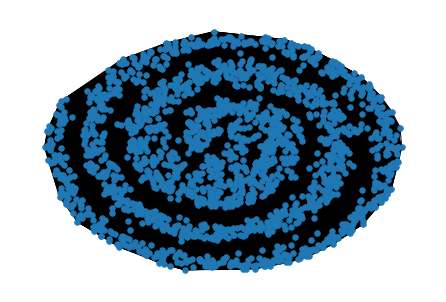

In [51]:
nx.draw(G, node_size=30)

## Partition the Graph

In [52]:
partition = community_louvain.best_partition(G)
print(partition)
size = float(len(set(partition.values())))
print("community:", size) # number of groups that was partitioned
mod = community_louvain.modularity(partition,G)
print("modularity:", mod)

{'1': 0, '2': 0, '3': 0, '4': 0, '5': 0, '6': 0, '7': 0, '8': 0, '9': 0, '10': 0, '11': 0, '12': 0, '13': 0, '14': 0, '15': 0, '16': 0, '17': 0, '18': 0, '19': 0, '20': 0, '21': 0, '22': 0, '23': 0, '24': 0, '25': 0, '26': 0, '27': 0, '28': 0, '29': 0, '30': 0, '31': 0, '32': 0, '33': 0, '34': 0, '35': 0, '36': 0, '37': 0, '38': 0, '39': 0, '40': 0, '41': 0, '42': 0, '43': 0, '44': 0, '45': 0, '46': 0, '47': 0, '48': 0, '49': 0, '50': 0, '51': 0, '52': 0, '53': 0, '54': 0, '55': 0, '56': 0, '57': 0, '58': 0, '59': 0, '60': 0, '61': 0, '62': 0, '63': 0, '64': 0, '65': 0, '66': 0, '67': 0, '68': 0, '69': 0, '70': 0, '71': 0, '72': 0, '73': 0, '74': 0, '75': 0, '76': 0, '77': 0, '78': 0, '79': 0, '80': 0, '81': 0, '82': 0, '83': 0, '84': 0, '85': 0, '86': 0, '87': 0, '88': 0, '89': 0, '90': 0, '91': 0, '92': 0, '93': 0, '94': 0, '95': 0, '96': 0, '97': 0, '98': 0, '99': 0, '100': 0, '101': 0, '102': 0, '103': 0, '104': 0, '105': 0, '106': 0, '107': 0, '108': 0, '109': 0, '110': 0, '111': 

### See each community's members

In [53]:
for com in set(partition.values()) :
    print("Community", com)
    members = list_nodes = [nodes for nodes in partition.keys() if partition[nodes] == com]
    print(members)

Community 0
['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '110', '111', '112', '113', '114', '115', '116', '117', '118', '119', '120', '121', '122', '123', '124', '125', '126', '127', '128', '129', '130', '131', '132', '133', '134', '135', '136', '137', '138', '139', '140', '141', '142', '143', '144', '145', '146', '147', '148', '149', '150', '151', '152', '153', '154', '155', '156', '15

### Assign node color based on community in network


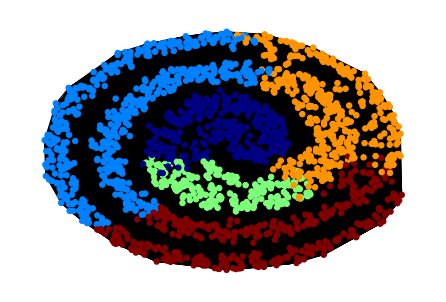

In [54]:
values = [partition.get(node) for node in G.nodes()]
nx.draw_spring(G, cmap = plt.get_cmap('jet'), node_color = values, node_size = 30, with_labels = False)
plt.show()    

### Assign data point color based on community in realspace

In [55]:
label = np.zeros((len(XYZ_C),1))

# get the nodes' label based on the nodes' order
for j in set(partition.values()) :
    for i in range(len(XYZ_C)) :
        if partition[str(i+1)] == j:           
            label[i] = j
labelRE = np.reshape(label, len(XYZ_C))  
print(labelRE)          

[0. 0. 0. ... 4. 4. 4.]


## Plot Result

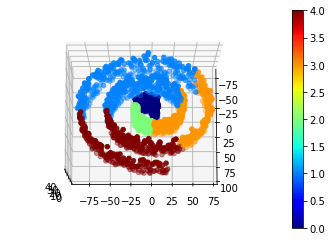

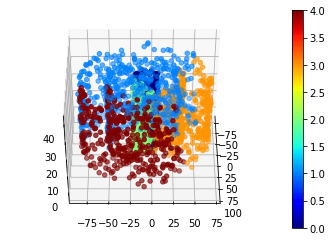

In [57]:
from mpl_toolkits.mplot3d import Axes3D
fig1 = plt.figure()
ax = plt.axes(projection='3d')
z = XYZ_C[:,2]
x = XYZ_C[:,0]
y = XYZ_C[:,1]
c = labelRE
ax1 = ax.scatter(x, y, z, c = c, cmap = plt.get_cmap('jet'))
ax.view_init(80, 0)
fig1.colorbar(ax1)

fig2 = plt.figure()
ax = plt.axes(projection='3d')
z = XYZ_C[:,2]
x = XYZ_C[:,0]
y = XYZ_C[:,1]
c = labelRE
ax2 = ax.scatter(x, y, z, c = c, cmap = plt.get_cmap('jet'))
ax.view_init(45, 0)
fig2.colorbar(ax2)

# Using K-Mean instead of modularity

In [58]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = (int(size))).fit(XYZ_C)
final_label = kmeans.labels_

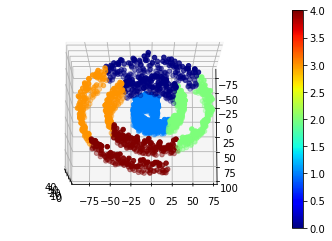

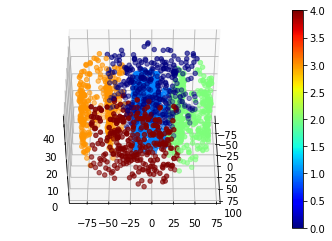

In [59]:
fig1 = plt.figure()
ax = plt.axes(projection='3d')
z = XYZ_C[:,2]
x = XYZ_C[:,0]
y = XYZ_C[:,1]
c = final_label
ax1 = ax.scatter(x, y, z, c = c, cmap = plt.get_cmap('jet'))
ax.view_init(80, 0)
fig1.colorbar(ax1)

fig2 = plt.figure()
ax = plt.axes(projection='3d')
z = XYZ_C[:,2]
x = XYZ_C[:,0]
y = XYZ_C[:,1]
c = final_label
ax2 = ax.scatter(x, y, z, c = c, cmap = plt.get_cmap('jet'))
ax.view_init(45, 0)
fig2.colorbar(ax2)